# Competitive Auctions on eBay.com

## eBay.com의 경쟁적인 경매

- [eBayAuction.csv] 파일에는 2004년 5~6월에 eBay.com에서 거래된 총 1,972건의 경매 정보가 담겨 있다. 분석 목적은 이 데이터를 사용해 경쟁적인 경매와 비경쟁적인 경매를 구분하는 모델을 구축하는 것이다.

- 경쟁적인 경매는 경매되고 있는 물품에 대해 최소한 2개 이상의 입찰이 있는 경매로 정의된다. 데이터는 물품을 나타내는 변수(경매 범주), 판매자 등급(eBay 등급), 판매자가 선택한 경매 조건(경매 기간, 시작가(OpenPrice), 화폐 단위, 경매 마감 요일)을 포함한다. 경매가 마감된 가격(ClosePrice)에 대한 데이터도 있다. 분석 목표는 경매가 경쟁적인지 아닌지를 예측하는 것이다.

- 데이터 전처리: 범주형 예측 변수들에 대해서 더미 변수를 생성하시오. 범주형 변수에는 물품 항목(Category: 18개 범주), 화폐 단위(currency: US, GBP, EUR), 경매 종료일(endDay: 월요일~일요일), 경매 기간(Duration: 1, 3, 5, 7, 10일)이 포함된다.

In [5]:
'''
eBayAuctions.csv파일을 읽어 DataFrame 생성
'''
import pandas as pd

eBayAuctions_df = pd.read_csv('../data/eBayAuctions.csv')
eBayAuctions_df

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [6]:
'''
범주형 예측 변수들에 대해서 더비 변수 생성
범주형 변수: Category, currency, endDay, Duration
'''
from sklearn.preprocessing import LabelEncoder

preprocessed_df = eBayAuctions_df.copy()
le = LabelEncoder()
preprocessed_df['Category'] = le.fit_transform(preprocessed_df['Category'])
preprocessed_df['currency'] = le.fit_transform(eBayAuctions_df['currency'])
preprocessed_df['endDay'] = le.fit_transform(eBayAuctions_df['endDay'])
preprocessed_df['Duration'] = le.fit_transform(eBayAuctions_df['Duration'])
preprocessed_df

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,13,2,3249,2,1,0.01,0.01,0
1,13,2,3249,2,1,0.01,0.01,0
2,13,2,3249,2,1,0.01,0.01,0
3,13,2,3249,2,1,0.01,0.01,0
4,13,2,3249,2,1,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,1,2,2992,2,3,359.95,359.95,0
1968,1,2,21,2,2,610.00,300.00,1
1969,1,2,1400,2,1,549.00,549.00,0
1970,1,2,57,3,0,820.00,650.00,1


- 다양한 범주형 변수들(더미 변수가 아닌 원래 변수 사용)의 함수로서 이진형 결과 변수(경쟁적인 경매 여부)의 평균을 구하기 위해 피벗 테이블을 작성하시오. 모델에서 사용될 더비 변수의 개수를 줄이기 위해서 피벗 테이블의 정보를 활용하시오. 예를 들어, 경쟁적인 경매의 분포가 유사한 범주는 합칠 수 있다.

                      Competitive?
Category                          
Antique/Art/Craft         0.564972
Automotive                0.353933
Books                     0.500000
Business/Industrial       0.666667
Clothing/Accessories      0.504202
Coins/Stamps              0.297297
Collectibles              0.577406
Computer                  0.666667
Electronics               0.800000
EverythingElse            0.235294
Health/Beauty             0.171875
Home/Garden               0.656863
Jewelry                   0.365854
Music/Movie/Game          0.602978
Photography               0.846154
Pottery/Glass             0.350000
SportingGoods             0.725806
Toys/Hobbies              0.529915


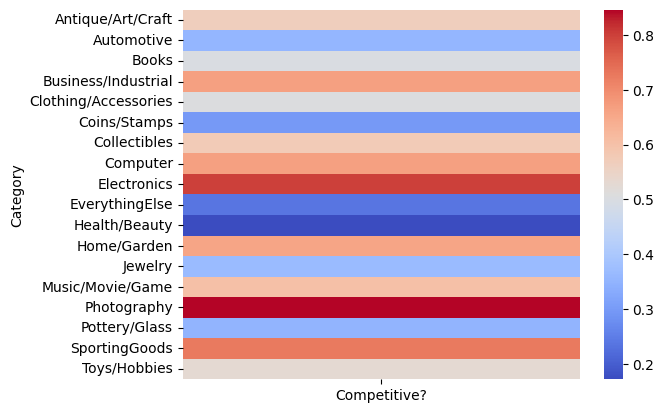

          Competitive?
currency              
EUR           0.551595
GBP           0.687075
US            0.519350


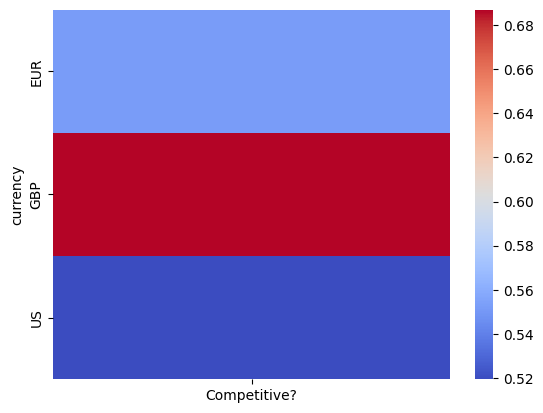

        Competitive?
endDay              
Fri         0.466899
Mon         0.673358
Sat         0.427350
Sun         0.485207
Thu         0.603960
Tue         0.532164
Wed         0.480000


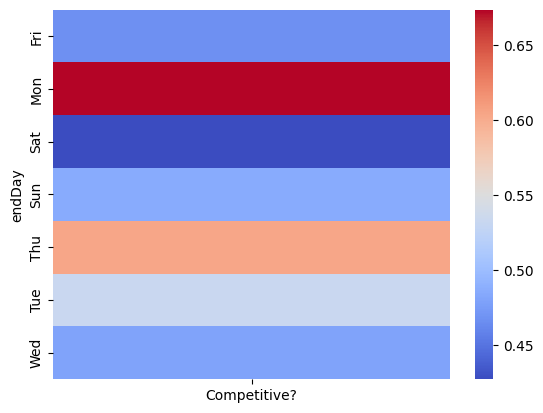

          Competitive?
Duration              
1             0.521739
3             0.450704
5             0.686695
7             0.489142
10            0.544554


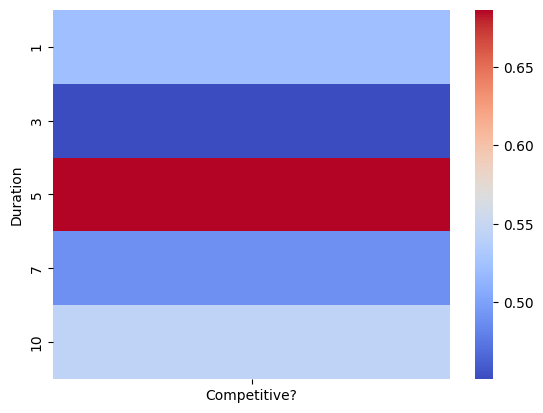

In [8]:
# 시각화 (seaborn 라이브러리 사용)
import seaborn as sns
import matplotlib.pyplot as plt

# Category, currency, endDay, Duration을 행 인덱스로, Competitive?를 값으로 하는 피벗 테이블 생성
pivot_table = eBayAuctions_df.pivot_table(index=['Category', 'currency', 'endDay', 'Duration'], values='Competitive?', aggfunc='mean')
# print(pivot_table.head(10))

Category_pivot = eBayAuctions_df.pivot_table(index='Category', values='Competitive?', aggfunc='mean')
print(Category_pivot)
# heatmap 시각화
sns.heatmap(Category_pivot, cmap='coolwarm')
plt.show()

currency_pivot = eBayAuctions_df.pivot_table(index='currency', values='Competitive?', aggfunc='mean')
print(currency_pivot)
# heatmap 시각화
sns.heatmap(currency_pivot, cmap='coolwarm')
plt.show()

endDay_pivot = eBayAuctions_df.pivot_table(index='endDay', values='Competitive?', aggfunc='mean')
print(endDay_pivot)
# heatmap 시각화
sns.heatmap(endDay_pivot, cmap='coolwarm')
plt.show()

Duration_pivot = eBayAuctions_df.pivot_table(index='Duration', values='Competitive?', aggfunc='mean')
print(Duration_pivot)
# heatmap 시각화
sns.heatmap(Duration_pivot, cmap='coolwarm')
plt.show()

- 데이터를 학습 데이터셋(60%)과 검증 데이터셋(40%)으로 분할한다. 컷오프 값을 0.5로 하여 모든 예측 변수들을 사용한 로지스틱 모델을 실행하시오.

- 경매가 경쟁적인 경매인지 아닌지를 경매 시작 시점에서 예측하길 원한다면 경매 종가에 대한 정보를 사용할 수 없다. 경매 종가를 제외한 모든 예측변수를 이용해 앞에서와 같이 로지스틱 모델을 실행하시오. 이러한 모델은 예측 정확도 관점에서 모든 예측변수를 사용한 모델과 어떻게 비교되는가?

- 경매 종가에 대한 회귀 계수의 의미를 해석하시오. 경매 종가는 실질적인 의미가 있는가? 경매 종가를 이용해 경쟁적인 경매를 예측하는 것이 통계적으로 의미가 있는가? (유의수준 10% 사용)

- [6장 다중선형회귀]에서 설명한 대로 단계적 회귀(stepwise regression)를 사용해 학습 데이터셋에 가장 잘 적합된(정확도가 가장 높은) 모델을 찾으시오. 어떤 예측변수가 사용되는가?

- 검증 데이터셋에서 가장 정확도가 높은 모델을 찾기 위해 단계적 회귀(stepwise regression)를 사용하시오. 어떤 예측변수가 사용되는가?

- 학습 데이터셋에 L1 페널티가 있는 벌점화(regularized) 로지스틱 회귀를 사용한다. 이 결과(예측변수와 분류 성능)를, 가장 잘 적합한 모델 및 가장 잘 예측한 모델의 결과와 비교하시오.

- 모델 분석의 주목적이 정확한 분류라고 한다면, 어떤 컷오프 값이 사용되어야 하는가?

- 이 데이터를 바탕으로 판매자가 정한 경매 조건(경매 기간, 시작가, 경매 마감 요일, 화폐 단위) 중 어떤 설정이 경쟁적인 판매로 이어질 가능성을 가장 높인다고 할 수 있겠는가?